# **Titanic Death prediction using Supervised Machine Learning**


---
### **Predict Deaths on Titanic**

> 

*   Defining the Problem Statement
*   Collecting Data

*   Exploratory Data Analysis
*   Feature Engineering

*   Classification








#1.  Defining Problem Statement


> Complete the analysis of what sorts of people were likely not survived(dead)


#2. Collecting Data
> Training and testing data are given by kagle, load train-test dataset directly using pandas.

In [0]:
import pandas as pd                  #importing library pandas as pd
train= pd.read_csv('train.csv')       #loading training data
test= pd.read_csv('test.csv')         #loading test data

#3.  Exploring Data 
> printing first 5 rows of train dataset

In [278]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Data Dictionary:

*   Survived:0=No, 1=Yes
*   PClass:Ticket Class 1=1st, 2=2nd, 3=3rd

*   Sibsp: No of Siblings/spouse
*   Parch: No of Parents/Children

*   Ticket: Ticket Number
*   Embarked:Port of Embarkation    C=Cherbourg,  Q=Queenstown,  S=Southamption







In [279]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [280]:
train.shape

(891, 12)

In [281]:
test.shape

(418, 11)

In [282]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [283]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [284]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [285]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### import python lib for visualization

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # setting seaborn default for plots

### Bar Chart for Categorical Features
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

<BarContainer object of 891 artists>

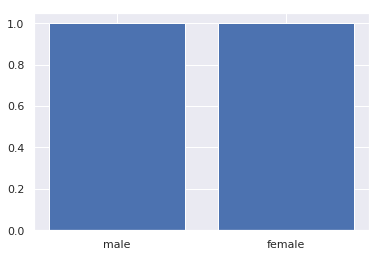

In [287]:
plt.bar(train.Sex,train.Survived)

In [0]:
def bar_chart(feature):  
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked=True, figsize=(10,5))

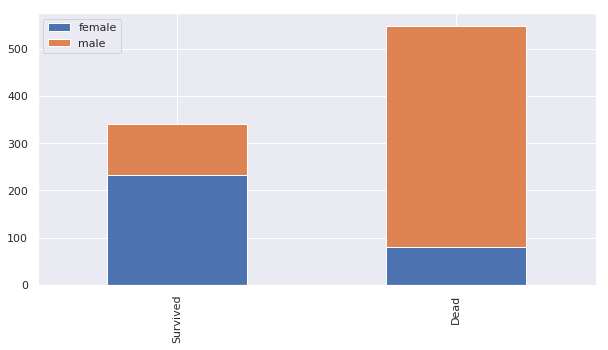

In [289]:
bar_chart('Sex')

The Chart confirms **Women** more likely survivied than **Men**

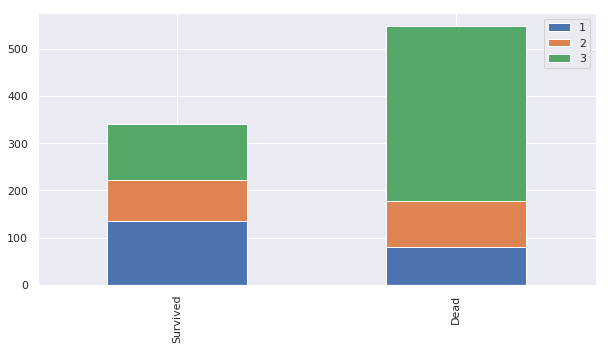

In [290]:
bar_chart('Pclass')

The Chart confirms **1st class** more likely survivied than **other classes**  
The Chart confirms **3rd class** more likely dead than **other classes**

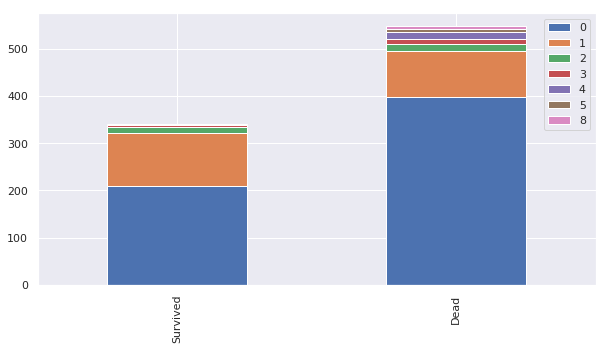

In [291]:
bar_chart('SibSp')

The Chart confirms **a person aboarded with more than 2 siblings or spouse** more likely survived  
The Chart confirms  **a person aboarded without siblings or spouse * more likely dead

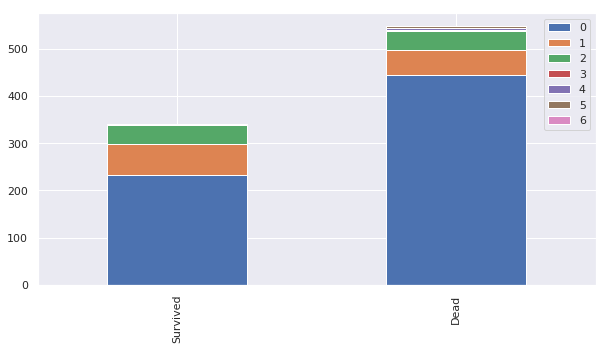

In [292]:
bar_chart('Parch')

The Chart confirms **a person aboarded with more than 2 parents or children** more likely survived  
The Chart confirms ** a person aboarded alone** more likely dead

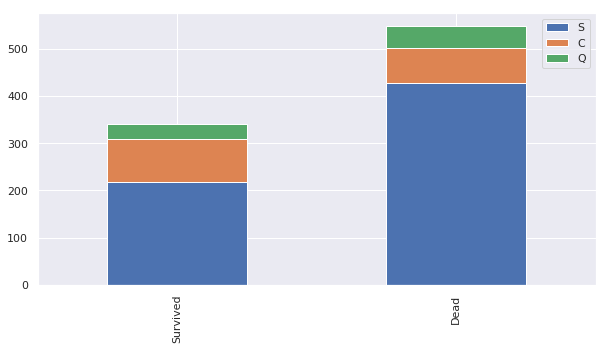

In [293]:
bar_chart('Embarked')

The Chart confirms **a person aboarded from C** slightly more likely survived  
The Chart confirms **a person aboarded from Q** more likely dead  
The Chart confirms **a person aboarded from S** more likely dead

## 4.  Modelling

In [294]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Selecting distinct columns
* Feaures for training data 
* Label for result data
*Test Data

In [0]:
#extract attribute from dataframe
features=train.iloc[:,[0,2,4,5,6,7,9,10,11]].values

#extracting label from dataframe
label=train.iloc[:,1].values

#extract attribute from dataframe
test=test.iloc[0:150,[0,1,3,4,5,6,8,9,10]].values

* Filling of null data from random data

In [0]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
features[0:,[3,7,8]]=imp.fit_transform(features[0:,[3,7,8]]) 
test[0:,[3,7]]=imp.fit_transform(test[0:,[3,7]]) 

* Assigning numerical value to the string values

In [0]:
from sklearn.preprocessing  import LabelEncoder
count=LabelEncoder()
features[:,2]= count.fit_transform(features[:,2])
features[:,7]=count.fit_transform(features[:,7])
features[:,8]=count.fit_transform(features[:,8])
test[:,2]= count.fit_transform(test[:,2])
test[:,7]=count.fit_transform(test[:,7])
test[:,8]=count.fit_transform(test[:,8])

##Decision Tree Classifier

In [0]:
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier

In [0]:
#calling classifier
clf=DecisionTreeClassifier()

In [0]:
# now training des clf
trained=clf.fit(features,label)

In [0]:
dpredict=trained.predict(test)

*Predicting values

In [302]:
dpredict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

* Calculating number of deaths

In [310]:
num_zeros = (dpredict == 0).sum()
num_zeros

95

* Total 95 dead and  55 left alive from the data of 150